In [1]:
# 20 Apr 2018
#
# plot the PV snapshots

import pydra_read
import matplotlib.pyplot as plt
import numpy as np

from casl import parameters, spectral, constants

In [2]:
kt = 650

data_dir = "/home/julian/data/hydra_data/jet/nx128ny64hb0.50kd20.0bdpi0.8w0.50r001/"

t_now, qq = pydra_read.read_qq(data_dir, parameters.nx, parameters.ny, kt)

# swap axis to have the indexing consistent with the Fortran code main_invert
qq = np.swapaxes(qq, 0, 1)

# no topography
fhb = np.zeros((parameters.ny + 1, parameters.nx))

x_vec = np.linspace(0, parameters.ellx, parameters.nx)
y_vec = np.linspace(-parameters.elly / 2, parameters.elly / 2, parameters.ny + 1)

number of frames found = 751 


Text(0.5,1,'$q_2 (t = 650)$')

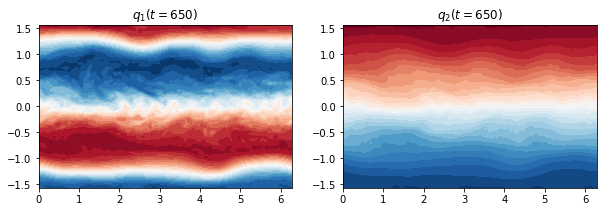

In [3]:
zfac = 1.0 / parameters.nx
hzafac = zfac / 2.0

uu, vv, pp = spectral.main_invert(qq, fhb)

fig = plt.figure(figsize=(10, 3))

ax1 = plt.subplot(1, 2, 1)
plt.contourf(x_vec, y_vec, qq[:, :, 0], 31, cmap = "RdBu_r")
plt.title(r"$q_1 (t = %g)$" % t_now)

ax2 = plt.subplot(1, 2, 2)
plt.contourf(x_vec, y_vec, qq[:, :, 1], 31, cmap = "RdBu_r")
plt.title(r"$q_2 (t = %g)$" % t_now)


Text(0.5,1,'$\\overline{q}_{bc}^x (t = 650)$')

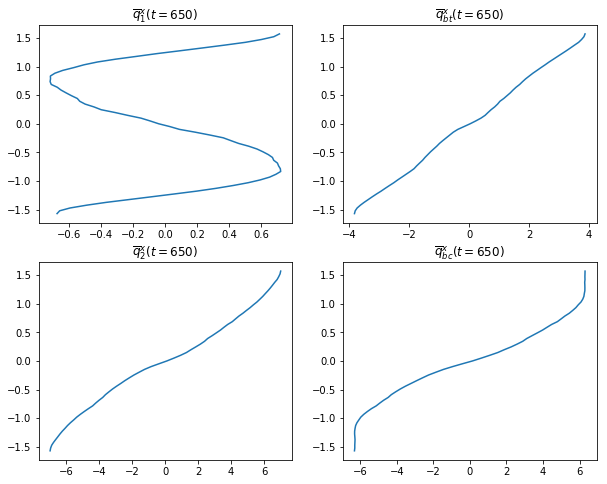

In [4]:
# conversion of PV into modes
q_bt = constants.vec11 * qq[:, :, 0] + constants.vec12 * qq[:, :, 1]
q_bc = constants.vec21 * qq[:, :, 0] + constants.vec22 * qq[:, :, 1]

fig = plt.figure(figsize=(10, 8))

ax1 = plt.subplot(2, 2, 1)
plt.plot(np.mean(qq[:, :, 0], axis = 1), y_vec) # x-average, uniform grid so just mean it
plt.title(r"$\overline{q}_1^x (t = %g)$" % t_now)

ax3 = plt.subplot(2, 2, 3)
plt.plot(np.mean(qq[:, :, 1], axis = 1), y_vec)
plt.title(r"$\overline{q}_2^x (t = %g)$" % t_now)

ax2 = plt.subplot(2, 2, 2)
plt.plot(np.mean(q_bt, axis = 1), y_vec)
plt.title(r"$\overline{q}_{bt}^x (t = %g)$" % t_now)

ax4 = plt.subplot(2, 2, 4)
plt.plot(np.mean(q_bc, axis = 1), y_vec)
plt.title(r"$\overline{q}_{bc}^x (t = %g)$" % t_now)

Text(0.5,1,'$\\overline{u}_{bc}^x (t = 650)$')

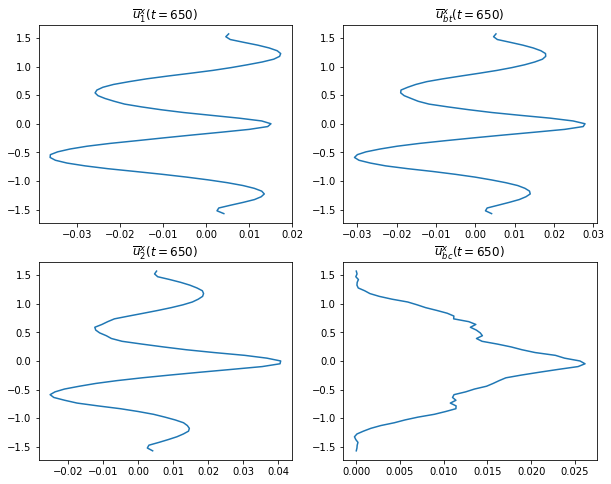

In [5]:
# conversion of velocity into modes

u_bt = constants.vec11 * uu[:, :, 0] + constants.vec12 * uu[:, :, 1]
u_bc = constants.vec21 * uu[:, :, 0] + constants.vec22 * uu[:, :, 1]

fig = plt.figure(figsize=(10, 8))

ax1 = plt.subplot(2, 2, 1)
plt.plot(np.mean(uu[:, :, 0], axis = 1), y_vec) # x-average, uniform grid so just mean it
plt.title(r"$\overline{u}_1^x (t = %g)$" % t_now)

ax3 = plt.subplot(2, 2, 3)
plt.plot(np.mean(uu[:, :, 1], axis = 1), y_vec)
plt.title(r"$\overline{u}_2^x (t = %g)$" % t_now)

ax2 = plt.subplot(2, 2, 2)
plt.plot(np.mean(u_bt, axis = 1), y_vec)
plt.title(r"$\overline{u}_{bt}^x (t = %g)$" % t_now)

ax4 = plt.subplot(2, 2, 4)
plt.plot(np.mean(u_bc, axis = 1), y_vec)
plt.title(r"$\overline{u}_{bc}^x (t = %g)$" % t_now)

Text(0.5,1,'$\\overline{EKE}_{2}^x (t = 650)$')

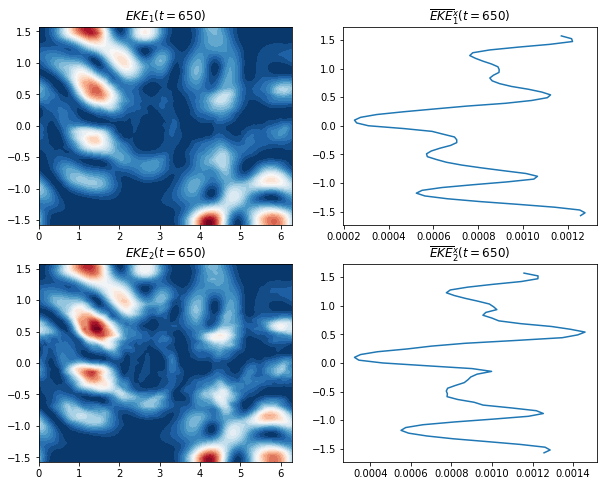

In [6]:
# plot the eke

u_1_mean = np.zeros((parameters.ny + 1, parameters.nx))
u_2_mean = np.zeros((parameters.ny + 1, parameters.nx))
for i in range(parameters.nx):
    u_1_mean[:, i] = np.mean(uu[:, :, 0], axis = 1)
    u_2_mean[:, i] = np.mean(uu[:, :, 1], axis = 1)

eke_1 = (uu[:, :, 0] - u_1_mean) ** 2 + vv[:, :, 0] ** 2
eke_2 = (uu[:, :, 1] - u_2_mean) ** 2 + vv[:, :, 1] ** 2

fig = plt.figure(figsize=(10, 8))

ax1 = plt.subplot(2, 2, 1)
plt.contourf(x_vec, y_vec, eke_1, 31, cmap = "RdBu_r")
plt.title(r"$EKE_1 (t = %g)$" % t_now)

ax3 = plt.subplot(2, 2, 3)
plt.contourf(x_vec, y_vec, eke_2, 31, cmap = "RdBu_r")
plt.title(r"$EKE_2 (t = %g)$" % t_now)

ax2 = plt.subplot(2, 2, 2)
plt.plot(np.mean(eke_1, axis = 1), y_vec)
plt.title(r"$\overline{EKE}_{1}^x (t = %g)$" % t_now)

ax4 = plt.subplot(2, 2, 4)
plt.plot(np.mean(eke_2, axis = 1), y_vec)
plt.title(r"$\overline{EKE}_{2}^x (t = %g)$" % t_now)

In [7]:
?np.broadcast